In [1]:
import matplotlib.pyplot as plt

import main
import data
import observatories	
import correlation
import download

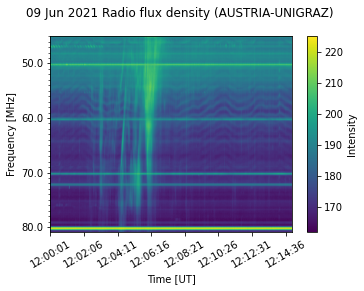

In [3]:
d2 = data.createFromTime(2021,6,9,'12:05:00',observatories.observatory_dict["AUSTRIA-UNIGRAZ"], main.spec_range)
d2.plot()

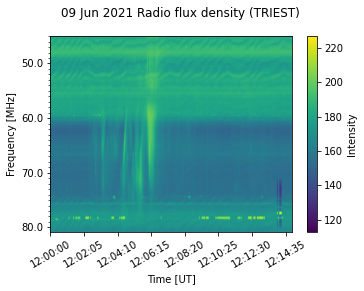

In [17]:
d3 = data.createFromTime(2021,6,9,'12:05:00',observatories.observatory_dict["TRIEST"], main.spec_range)
d3.plot()

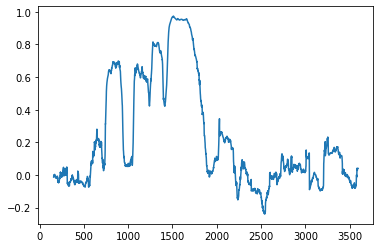

Burst(s) detected at: AUSTRIA-OE3FLB & AUSTRIA-UNIGRAZ
[12:05:18, 0.9723198607798537]


In [8]:
d1 = data.createFromTime(2021,6,9,'12:05:00',observatories.observatory_dict["AUSTRIA"], main.spec_range)
d2 = data.createFromTime(2021,6,9,'12:05:00',observatories.observatory_dict["AUSTRIA-UNIGRAZ"], main.spec_range)
cor = correlation.Correlation(d1, d2, False, False, False, False, 1, 1, 160)
cor.getPeaks()
plt.plot(cor.data_curve)
plt.show()
cor.printResult()

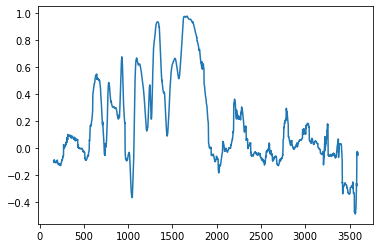

Burst(s) detected at: AUSTRIA-UNIGRAZ & TRIEST
[12:05:22, 0.9342547796532062]
[12:06:41, 0.9754133080258778]


In [16]:
d2 = data.createFromTime(2021,6,9,'12:05:00',observatories.observatory_dict["AUSTRIA-UNIGRAZ"], main.spec_range)
d3 = data.createFromTime(2021,6,9,'12:05:00',observatories.observatory_dict["TRIEST"], main.spec_range)
cor = correlation.Correlation(d2, d3, False, False, False, False, 1, 1, 160)
cor.getPeaks()
plt.plot(cor.data_curve)
plt.show()
cor.printResult()

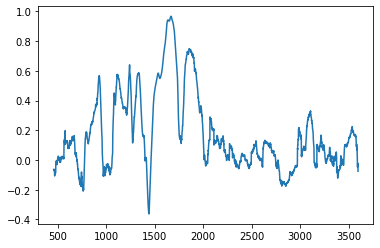

Burst(s) detected at: AUSTRIA-OE3FLB & TRIEST
[12:06:38, 0.9670501262154392]


In [20]:
d1 = data.createFromTime(2021,6,9,'12:05:00',observatories.observatory_dict["AUSTRIA"], main.spec_range)
d3 = data.createFromTime(2021,6,9,'12:05:00',observatories.observatory_dict["TRIEST"], main.spec_range)
cor = correlation.Correlation(d1, d3, False, False, False, True, 4, 300, 160)
cor.getPeaks()
plt.plot(cor.data_curve)
plt.show()
cor.printResult()


In [7]:
import matplotlib.pyplot as plt
import const
import data
import observatories
import download
import analysis
import correlation

In [11]:
spec_range = [45, 81]
reference = [[2017, 4, 18, correlation.Comparison(["09:36:00"])],
                 [2017, 6, 1, correlation.Comparison(["11:34:00"])],
                 [2017, 7, 11, correlation.Comparison(["13:20:00"])],
                 [2017, 9, 2, correlation.Comparison(["12:28:00"])],
                 [2017, 9, 4, correlation.Comparison(["08:33:00"])],
                 [2017, 9, 6, correlation.Comparison(["09:18:00", "15:25:00"])],
                 [2017, 9, 7, correlation.Comparison(["09:53:00", "10:15:00", "12:55:00"])],
                 [2017, 9, 8, correlation.Comparison(["07:06:00", "09:20:00", "10:47:00", "10:54:00",
                                                      "13:22:00", "14:01:00", "15:37:00"])],
                 [2017, 9, 9, correlation.Comparison(["11:17:00", "11:44:00"])],
                 [2017, 9, 27, correlation.Comparison(["12:10:00"])],
                 [2020, 3, 8, correlation.Comparison(["15:33:00", "15:36:00"])],
                 [2020, 10, 27, correlation.Comparison(["08:52:00", "10:58:00", "11:43:00"])],
                 [2020, 11, 20, correlation.Comparison(["13:28:00"])],
                 [2020, 11, 21, correlation.Comparison(["10:46:00", "11:32:00"])],
                 [2020, 11, 22, correlation.Comparison(["11:00:00", "11:08:00", "14:17:00"])],
                 [2020, 12, 27, correlation.Comparison(["11:37:00", "12:35:00"])],
                 [2020, 12, 30, correlation.Comparison(["14:26:00"])],
                 [2021, 4, 24, correlation.Comparison(["10:23:00"])],
                 [2021, 4, 26, correlation.Comparison(["13:56:00"])]]
observatory = [observatories.uni_graz, observatories.oe3flb, observatories.swiss_landschlacht, observatories.austria]
ref = reference[1]
year = ref[0]
month = ref[1]
day = ref[2]
obs_ = download.observatoriesAvailable(year, month, day)[1]

flatten = True
flatten_w = 220
bin_f = False
nobg = True
bin_t = False
bin_t_w = 4
r_w = 180

In [12]:
dp_1 = data.createDay(year, month, day, obs_[0], spec_range)
dp_2 = data.createDay(year, month, day, obs_[1], spec_range)
dp_1_clean, dp_2_clean = data.fitTimeFrameDataSample(dp_1, dp_2)
corr = correlation.Correlation(dp_1_clean, dp_2_clean, nobg, bin_f, bin_t, flatten, bin_t_w, flatten_w, r_w)
corr.getPeaks()
result = corr.compareToTest(ref[3])
result

No false peaks found
Events not found (1/1): 
 [[11:34:00, 1]]


[[[11:34:00, 1]], []]

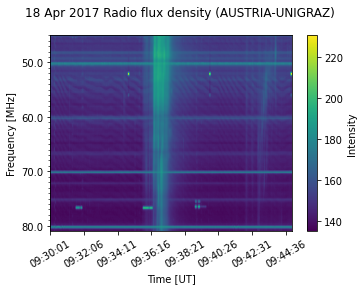

IndexError: list index out of range

In [12]:
o_unigraz = observatories.uni_graz
spec_range = [45, 81]
def plotPoint(year, month, day, time):
    p1 = data.createFromTime(year,month,day,time, o_unigraz, spec_range)
    p1.plot()
    p2 = data.createFromTime(year,month,day,time, observatories.swiss_landschlacht, spec_range)
    p2.plot()

def plotPoint2(year, month, day, time):
    p1 = data.createFromTime(year,month,day,time, o_unigraz, spec_range)
    p1.plot()
    p2 = data.createFromTime(year,month,day,time, observatories.austria, spec_range)
    p2.plot()
    p3 = data.createFromTime(year, month, day, time, observatories.triest, spec_range)
    p3.plot()

plotPoint(2017,4,18,"09:35:00")


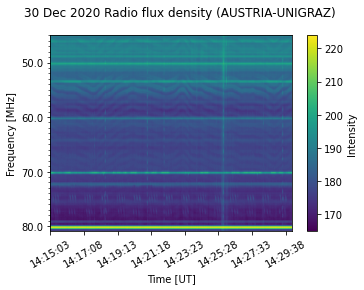

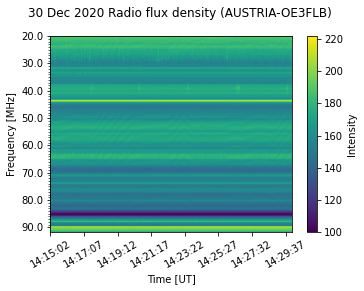

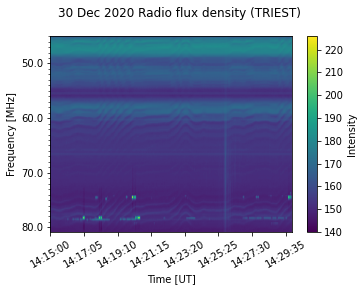

In [13]:
plotPoint2(2020,12,30,"14:26:00")

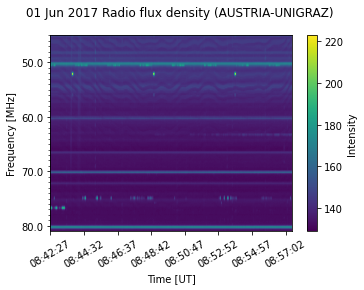

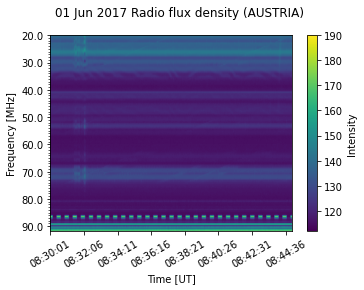

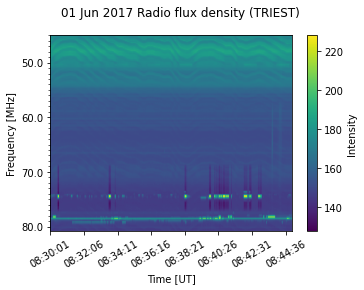

In [16]:
plotPoint2(2017,6,1,"08:44:00") 

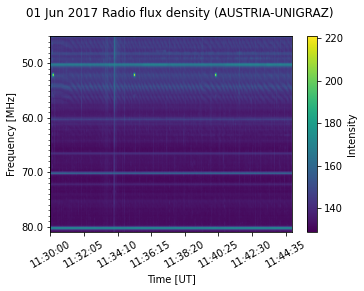

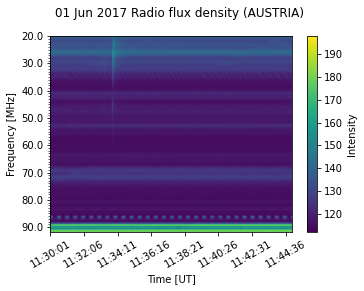

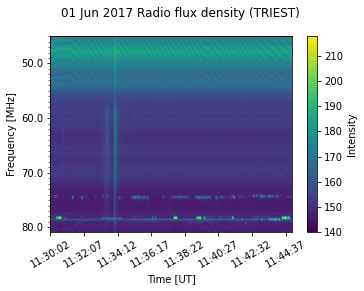

In [17]:
plotPoint2(2017,6,1,"11:34:00") 

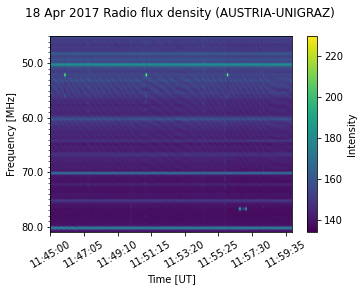

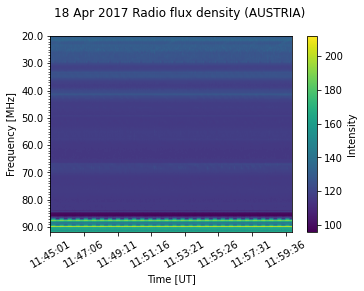

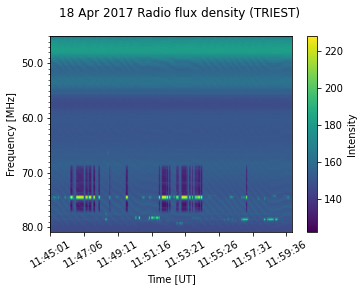

In [11]:
plotPoint2(2017,4,18,"11:55:00") # .81257

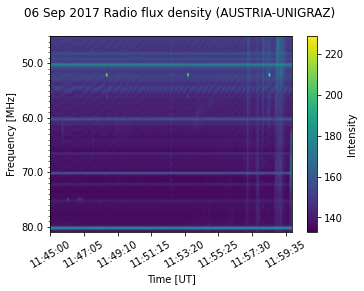

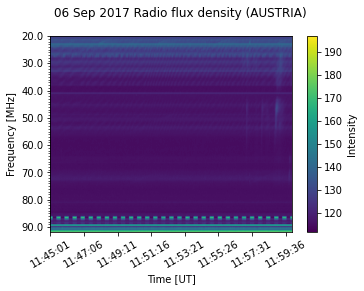

In [19]:
plotPoint2(2017,9,6,"11:57:57")

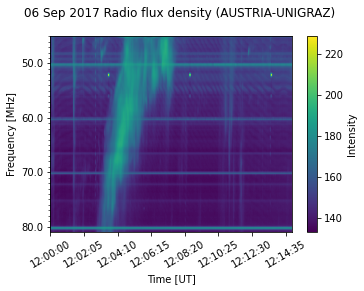

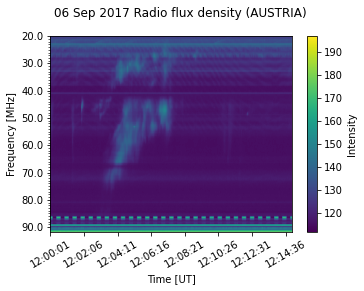

In [20]:
plotPoint2(2017,9,6,"12:01:25")

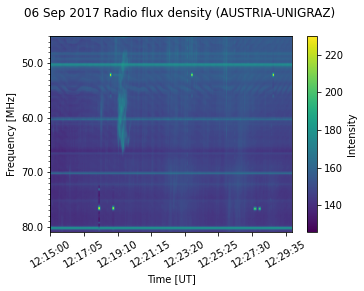

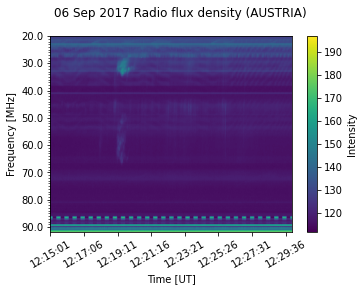

In [21]:
plotPoint2(2017,9,6,"12:18:11") # also "12:24:43"

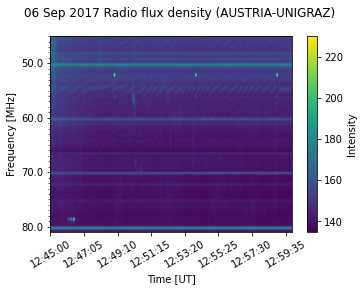

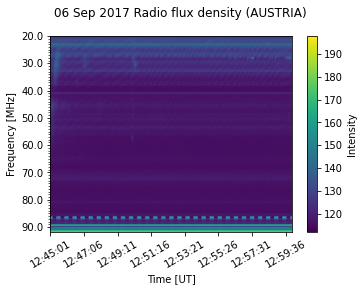

In [23]:
plotPoint2(2017,9,6,"12:45:03")

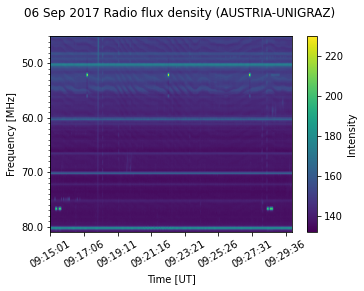

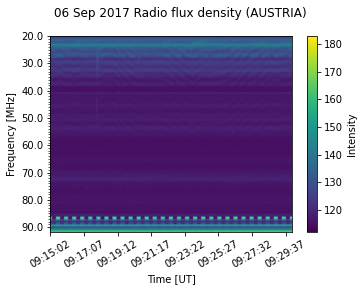

In [24]:
plotPoint2(2017,9,6,"09:18:00")

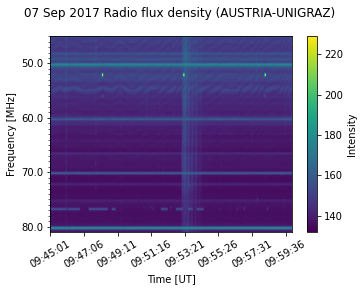

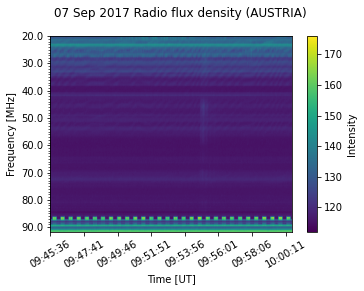

In [26]:
plotPoint2(2017,9,7,"09:55:01") 

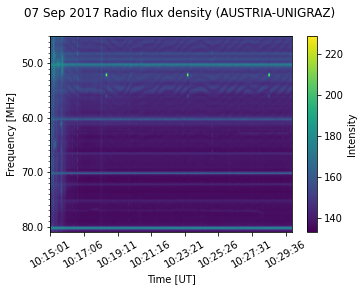

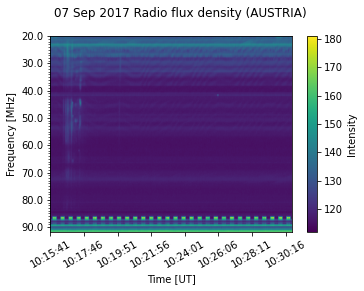

In [28]:
plotPoint2(2017,9,7,"10:16:00") 

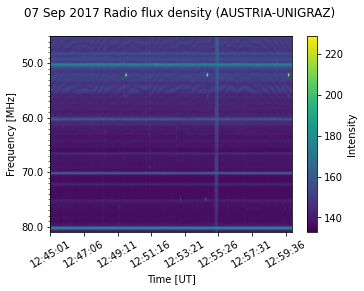

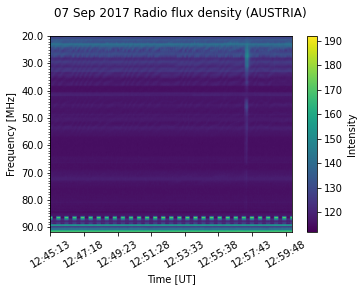

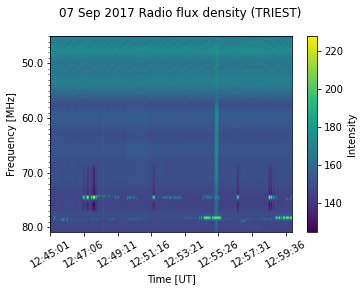

In [32]:
plotPoint2(2017,9,7,"12:55:00") 
px = data.createFromTime(2017,9,7,"12:55:00", observatories.triest, spec_range)
px.plot()

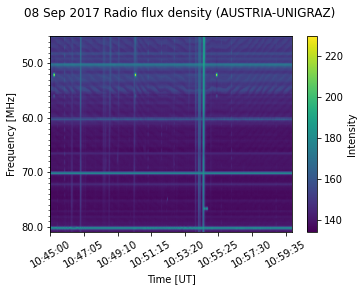

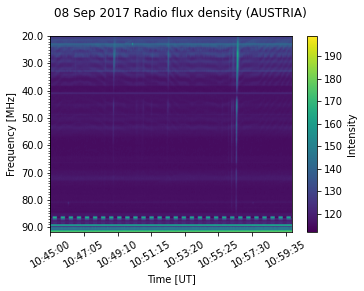

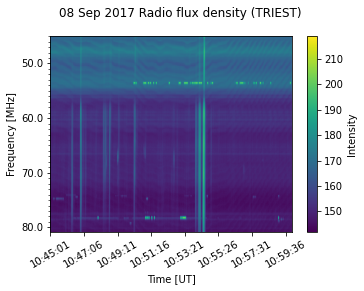

In [35]:
plotPoint2(2017,9,8,"10:56:15") 
download.downloadFullDay(2017,9,8,observatories.triest)
px = data.createFromTime(2017,9,8,"10:56:15", observatories.triest, spec_range)
px.plot()

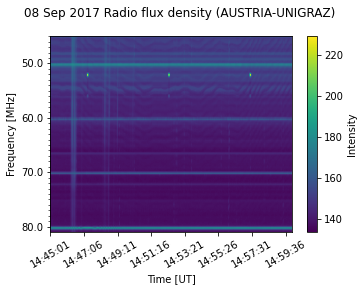

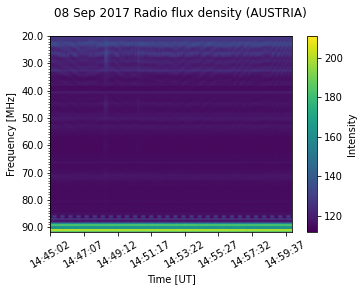

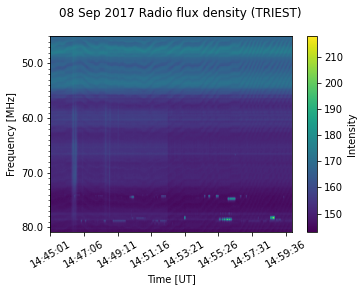

In [36]:
plotPoint2(2017,9,8,"14:48:24") 
download.downloadFullDay(2017,9,8,observatories.triest)
px = data.createFromTime(2017,9,8,"14:48:24", observatories.triest, spec_range)
px.plot()

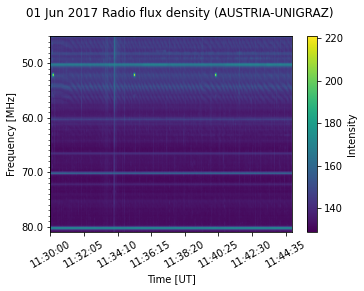

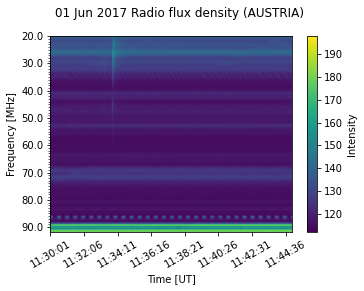

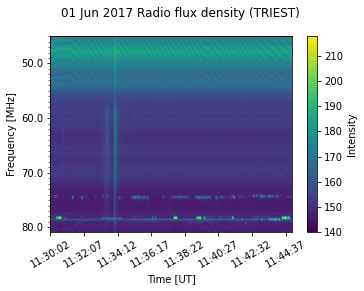

In [28]:
plotPoint2(2017,6,1,"11:34:00")

In [1]:
import data
import observatories
import matplotlib.pyplot as plt
import correlation
import numpy as np
spec_range = [45,81]

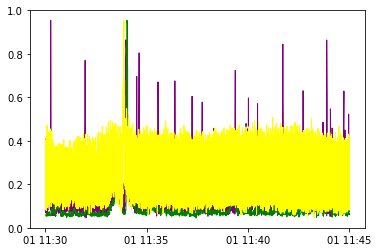

[]
[['III', 11:33:33, 11:33:59, 0.7381388064398023]]
[['III', 11:33:32, 11:35:24, 0.7721835117791699]]
[['III', 11:33:38, 11:35:50, 0.7523139312463581]]


C:\Users\Lukas\AppData\Local\Temp/ipykernel_2532/909153637.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


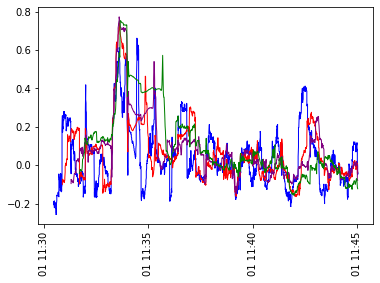

In [7]:
dp1 = data.createFromTime(2017,6,1,"11:34:00", observatories.uni_graz, spec_range)
dp2 = data.createFromTime(2017,6,1,"11:34:00", observatories.triest, spec_range)
dp3 = data.createFromTime(2017,6,1,"11:34:00", observatories.austria, spec_range)
fig, ax = plt.subplots()
dp1.createSummedCurve(spec_range)
dp1.plotSummedCurve(ax)
dp2.createSummedCurve(spec_range)
dp2.plotSummedCurve(ax)
dp3.createSummedCurve(spec_range)
dp3.plotSummedCurve(ax)
plt.show()

fig, ax = plt.subplots()

dp1 = data.createFromTime(2017,6,1,"11:34:00", observatories.uni_graz, spec_range)
dp2 = data.createFromTime(2017,6,1,"11:34:00", observatories.triest, spec_range)
dp3 = data.createFromTime(2017,6,1,"11:34:00", observatories.austria, spec_range)
cor0 = correlation.Correlation(dp1, dp2, _bin_time=False, _bin_time_width=2, method_bin_t='mean',_r_window=100)
cor0.calculatePeaks()
cor0.plotCurve(ax)
print(cor0.peaks)

dp1 = data.createFromTime(2017,6,1,"11:34:00", observatories.uni_graz, spec_range)
dp2 = data.createFromTime(2017,6,1,"11:34:00", observatories.triest, spec_range)
dp3 = data.createFromTime(2017,6,1,"11:34:00", observatories.austria, spec_range)
cor1 = correlation.Correlation(dp1, dp2, _bin_time=True, _bin_time_width=2, method_bin_t='mean', _r_window=100)
cor1.calculatePeaks()
cor1.plotCurve(ax)
print(cor1.peaks)

dp1 = data.createFromTime(2017,6,1,"11:34:00", observatories.uni_graz, spec_range)
dp2 = data.createFromTime(2017,6,1,"11:34:00", observatories.triest, spec_range)
dp3 = data.createFromTime(2017,6,1,"11:34:00", observatories.austria, spec_range)
cor2 = correlation.Correlation(dp1, dp2, _bin_time=True, _bin_time_width=3, method_bin_t='mean', _r_window=100)
cor2.calculatePeaks()
cor2.plotCurve(ax)
print(cor2.peaks)

dp1 = data.createFromTime(2017,6,1,"11:34:00", observatories.uni_graz, spec_range)
dp2 = data.createFromTime(2017,6,1,"11:34:00", observatories.triest, spec_range)
dp3 = data.createFromTime(2017,6,1,"11:34:00", observatories.austria, spec_range)
cor3 = correlation.Correlation(dp1, dp2, _bin_time=True, _bin_time_width=4, method_bin_t='mean', _r_window=100)
cor3.calculatePeaks()
cor3.plotCurve(ax)
print(cor3.peaks)

fig.show()

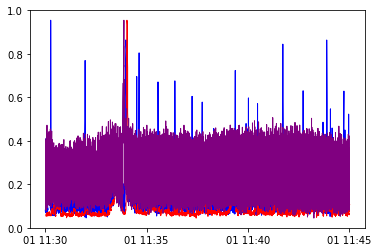

[]
[['III', 11:33:33, 11:33:59, 0.7381388064398023]]
[['III', 11:33:27, 11:35:33, 0.8599807689486113]]
[['III', 11:33:38, 11:35:57, 0.8424375289631131]]


C:\Users\Lukas\AppData\Local\Temp/ipykernel_2532/556520046.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


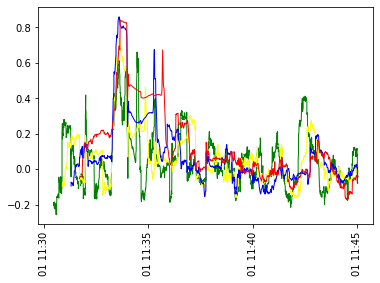

In [6]:
dp1 = data.createFromTime(2017,6,1,"11:34:00", observatories.uni_graz, spec_range)
dp2 = data.createFromTime(2017,6,1,"11:34:00", observatories.triest, spec_range)
dp3 = data.createFromTime(2017,6,1,"11:34:00", observatories.austria, spec_range)
fig, ax = plt.subplots()
dp1.createSummedCurve(spec_range)
dp1.plotSummedCurve(ax)
dp2.createSummedCurve(spec_range)
dp2.plotSummedCurve(ax)
dp3.createSummedCurve(spec_range)
dp3.plotSummedCurve(ax)
plt.show()

fig, ax = plt.subplots()

dp1 = data.createFromTime(2017,6,1,"11:34:00", observatories.uni_graz, spec_range)
dp2 = data.createFromTime(2017,6,1,"11:34:00", observatories.triest, spec_range)
dp3 = data.createFromTime(2017,6,1,"11:34:00", observatories.austria, spec_range)
cor0 = correlation.Correlation(dp1, dp2, _bin_time=False, _bin_time_width=2, method_bin_t='median',_r_window=100)
cor0.calculatePeaks()
cor0.plotCurve(ax)
print(cor0.peaks)

dp1 = data.createFromTime(2017,6,1,"11:34:00", observatories.uni_graz, spec_range)
dp2 = data.createFromTime(2017,6,1,"11:34:00", observatories.triest, spec_range)
dp3 = data.createFromTime(2017,6,1,"11:34:00", observatories.austria, spec_range)
cor1 = correlation.Correlation(dp1, dp2, _bin_time=True, _bin_time_width=2, method_bin_t='median', _r_window=100)
cor1.calculatePeaks()
cor1.plotCurve(ax)
print(cor1.peaks)

dp1 = data.createFromTime(2017,6,1,"11:34:00", observatories.uni_graz, spec_range)
dp2 = data.createFromTime(2017,6,1,"11:34:00", observatories.triest, spec_range)
dp3 = data.createFromTime(2017,6,1,"11:34:00", observatories.austria, spec_range)
cor2 = correlation.Correlation(dp1, dp2, _bin_time=True, _bin_time_width=3, method_bin_t='median', _r_window=100)
cor2.calculatePeaks()
cor2.plotCurve(ax)
print(cor2.peaks)

dp1 = data.createFromTime(2017,6,1,"11:34:00", observatories.uni_graz, spec_range)
dp2 = data.createFromTime(2017,6,1,"11:34:00", observatories.triest, spec_range)
dp3 = data.createFromTime(2017,6,1,"11:34:00", observatories.austria, spec_range)
cor3 = correlation.Correlation(dp1, dp2, _bin_time=True, _bin_time_width=4, method_bin_t='median', _r_window=100)
cor3.calculatePeaks()
cor3.plotCurve(ax)
print(cor3.peaks)

fig.show()

[]
[]
[]
[]


C:\Users\Lukas\AppData\Local\Temp/ipykernel_2532/1338719319.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


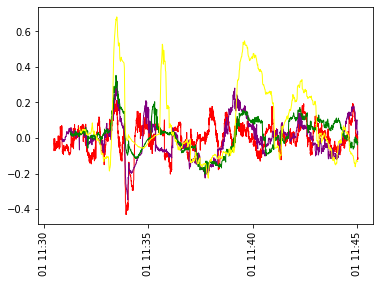

In [9]:
fig, ax = plt.subplots()

dp1 = data.createFromTime(2017,6,1,"11:34:00", observatories.uni_graz, spec_range)
dp2 = data.createFromTime(2017,6,1,"11:34:00", observatories.triest, spec_range)
dp3 = data.createFromTime(2017,6,1,"11:34:00", observatories.austria, spec_range)
cor0 = correlation.Correlation(dp3, dp2, _bin_time=False, _bin_time_width=2, method_bin_t='mean',_r_window=100)
cor0.calculatePeaks()
cor0.plotCurve(ax)
print(cor0.peaks)

dp1 = data.createFromTime(2017,6,1,"11:34:00", observatories.uni_graz, spec_range)
dp2 = data.createFromTime(2017,6,1,"11:34:00", observatories.triest, spec_range)
dp3 = data.createFromTime(2017,6,1,"11:34:00", observatories.austria, spec_range)
cor1 = correlation.Correlation(dp3, dp2, _bin_time=True, _bin_time_width=2, method_bin_t='mean', _r_window=100)
cor1.calculatePeaks()
cor1.plotCurve(ax)
print(cor1.peaks)

dp1 = data.createFromTime(2017,6,1,"11:34:00", observatories.uni_graz, spec_range)
dp2 = data.createFromTime(2017,6,1,"11:34:00", observatories.triest, spec_range)
dp3 = data.createFromTime(2017,6,1,"11:34:00", observatories.austria, spec_range)
cor2 = correlation.Correlation(dp3, dp2, _bin_time=True, _bin_time_width=3, method_bin_t='mean', _r_window=100)
cor2.calculatePeaks()
cor2.plotCurve(ax)
print(cor2.peaks)

dp1 = data.createFromTime(2017,6,1,"11:34:00", observatories.uni_graz, spec_range)
dp2 = data.createFromTime(2017,6,1,"11:34:00", observatories.triest, spec_range)
dp3 = data.createFromTime(2017,6,1,"11:34:00", observatories.austria, spec_range)
cor3 = correlation.Correlation(dp3, dp2, _bin_time=True, _bin_time_width=4, method_bin_t='mean', _r_window=100)
cor3.calculatePeaks()
cor3.plotCurve(ax)
print(cor3.peaks)

fig.show()

[]
[]
[]
[]


C:\Users\Lukas\AppData\Local\Temp/ipykernel_2532/2295067038.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


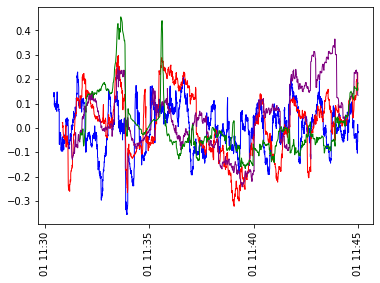

In [10]:
fig, ax = plt.subplots()

dp1 = data.createFromTime(2017,6,1,"11:34:00", observatories.uni_graz, spec_range)
dp2 = data.createFromTime(2017,6,1,"11:34:00", observatories.triest, spec_range)
dp3 = data.createFromTime(2017,6,1,"11:34:00", observatories.austria, spec_range)
cor0 = correlation.Correlation(dp3, dp1, _bin_time=False, _bin_time_width=2, method_bin_t='median',_r_window=100)
cor0.calculatePeaks()
cor0.plotCurve(ax)
print(cor0.peaks)

dp1 = data.createFromTime(2017,6,1,"11:34:00", observatories.uni_graz, spec_range)
dp2 = data.createFromTime(2017,6,1,"11:34:00", observatories.triest, spec_range)
dp3 = data.createFromTime(2017,6,1,"11:34:00", observatories.austria, spec_range)
cor1 = correlation.Correlation(dp3, dp1, _bin_time=True, _bin_time_width=2, method_bin_t='median', _r_window=100)
cor1.calculatePeaks()
cor1.plotCurve(ax)
print(cor1.peaks)

dp1 = data.createFromTime(2017,6,1,"11:34:00", observatories.uni_graz, spec_range)
dp2 = data.createFromTime(2017,6,1,"11:34:00", observatories.triest, spec_range)
dp3 = data.createFromTime(2017,6,1,"11:34:00", observatories.austria, spec_range)
cor2 = correlation.Correlation(dp3, dp1, _bin_time=True, _bin_time_width=3, method_bin_t='median', _r_window=100)
cor2.calculatePeaks()
cor2.plotCurve(ax)
print(cor2.peaks)

dp1 = data.createFromTime(2017,6,1,"11:34:00", observatories.uni_graz, spec_range)
dp2 = data.createFromTime(2017,6,1,"11:34:00", observatories.triest, spec_range)
dp3 = data.createFromTime(2017,6,1,"11:34:00", observatories.austria, spec_range)
cor3 = correlation.Correlation(dp3, dp1, _bin_time=True, _bin_time_width=4, method_bin_t='median', _r_window=100)
cor3.calculatePeaks()
cor3.plotCurve(ax)
print(cor3.peaks)

fig.show()

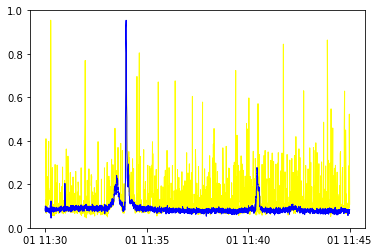

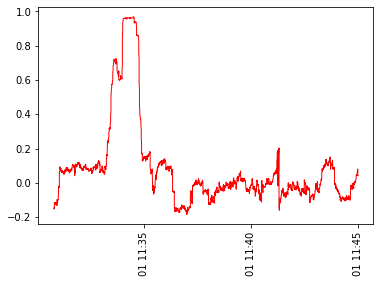

In [4]:
fig, ax = plt.subplots()
dp1 = data.createFromTime(2017,6,1,"11:34:00", observatories.uni_graz, spec_range)
dp2 = data.createFromTime(2017,6,1,"11:34:00", observatories.bir, spec_range)
dp1.createSummedCurve(spec_range)
dp1.plotSummedCurve(ax)
dp2.createSummedCurve(spec_range)
dp2.plotSummedCurve(ax)
plt.show()
cor = correlation.Correlation(dp1, dp2, False, False, False, False, 4, 1, 180)
cor.getPeaks()
fig, ax = plt.subplots()
cor.plotCurve(ax)

In [6]:
cor.printResult()

Burst(s) detected at: AUSTRIA-UNIGRAZ & BIR
[11:33:33, 0.9679877402997781]
